In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy import integrate
from scipy.integrate import odeint


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei']# *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

In [27]:
def module(w,t, gs, gr, ks, kr, EC_50s, EC_50r, Nmax, C0): #* C0为初始药物浓度 
    # *给出位置矢量w，和若干参数
    # *dx/dt, dy/dt, dz/dt的值
    S, R = w.tolist()
    C = C0 * np.exp(-1/12 * np.log(6) * (t%24)) #* 药物浓度C随时间的变化 
    dS = (gs*((Nmax - S - R) /Nmax) - ks * C/(C + EC_50s) ) * S
    dR = (gr*((Nmax - S - R) /Nmax) - kr * C/(C + EC_50r) ) * R
    
    return dS,dR


In [35]:
t = np.arange(0, 96, 0.1) # * 创建时间点 
# * 调用ode对该模型进行求解 
args_1 = (0.99,0.66 , 1.56 , 1.17 , 0.21 , 5.19 , 1.10e9, 3.0)
track1 = odeint(module, (7000000,7000000), t, args=args_1) #* 前一个参数是R 后一个参数是S


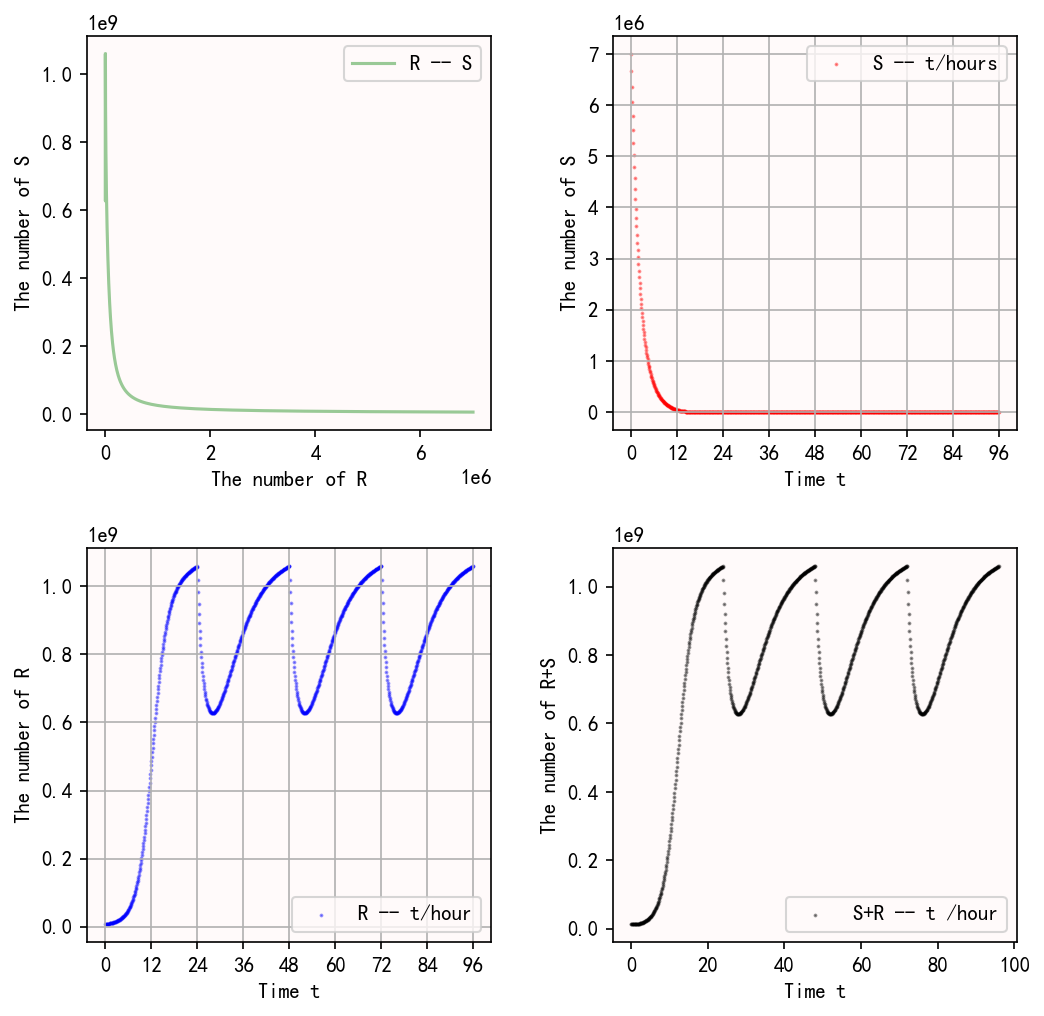

In [36]:
fig, axes = plt.subplots(2,2,figsize=(8,8),dpi = 150)
fig.patch.set_facecolor("white") #* 更改主图背景颜色，免得savefig的时候背景虚化
axes[0][0].plot(track1[:,0],track1[:,1],color = "green" , alpha = 0.4, label = "R -- S")

axes[0][1].scatter(t,track1[:,0],s=0.7 , color = "red" ,alpha = 0.4,label = "S -- t/hours")

axes[1][0].scatter(t,track1[:,1],s=0.7 , color = "blue" , alpha = 0.4,label = "R -- t/hour")

axes[1][1].scatter(t,track1[:,0]+track1[:,1], s = 0.7 , color = "black" , alpha = 0.4, label = "S+R -- t /hour")
for i in range(2):
    for j in range(2):
        axes[i][j].legend()
# * 设置标签
axes[0][0].set_xlabel("The number of R")
axes[0][0].set_ylabel("The number of S")

axes[0][1].set_xlabel("Time t")
axes[0][1].set_ylabel("The number of S")

axes[1][0].set_xlabel("Time t")
axes[1][0].set_ylabel("The number of R")

axes[1][1].set_xlabel("Time t")
axes[1][1].set_ylabel("The number of R+S")
# * 设置刻度
x_major_locator = MultipleLocator(12)
axes[0][1].xaxis.set_major_locator(x_major_locator)
axes[1][0].xaxis.set_major_locator(x_major_locator)
axes[0][1].grid()
axes[1][0].grid()

plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)

plt.savefig("Version_1.png")

plt.show()


# * 给药时间为每12小时给药，药物浓度随时间变化服从半衰期等于 1/12 * log(6) 的 exp 函数